# Business Understanding

In this project I would like to gain some insight about tech jobs / careers as I plan to shift career in mid-term and Stackoverflow's annual developer survey presents an excellent material for this. In the frame of this analysis, I will try to figure out
 - What are the different tech roles at all that represent the market?
 - What career satisfaction can be measured among various tech professionals?
 - What are the company profiles that employ people who attended bootcamps?

# Data Understanding

I chose to analyse the provided dataset from Stack Overflow, which is an outcome of an annual survey of people using the site. (I have analysed the survey results of 2017.) The survey covers all sort of information like programming languages, salary, code style and various other information. The dataset I worked with includes more than 64000 responses from 213 countries around the world. The survey has collected significant amount of data points as therein more than 150 question were asked.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

To get a better understanding of the data I used for this analysis, first I look at the data itself.

In [55]:
df = pd.read_csv("data/survey-results-public.csv")
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's get the size of the dataset (we know from the previous preview that it has 154 columns), the number of rows:

In [56]:
n_rows = df.shape[0]
n_rows

51392

Dealing with missing data is always important in the data science process. Thus below some statistics about this.

In [57]:
no_nulls = set(df.columns[df.isnull().mean()==0])
print("The following columns are completely populated, no missing values identified:")
no_nulls

The following columns are completely populated, no missing values identified:


{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

# Prepare

In [242]:
# Filtering for interested regions only:
df = df[df.Country.isin(['United Kingdom', 'Switzerland', 'Germany', 'Austria', 'Hungary'])]
df.Country.value_counts()

United Kingdom    3301
Germany           2767
Switzerland        406
Austria            334
Hungary            234
Name: Country, dtype: int64

In [108]:
# Filtering for non empty Developer Type:
df = df[df.DeveloperType.notnull()]

In [244]:
# Creating stat dictionary about developer types
devtyp_list_raw = str(tuple(df.DeveloperType.tolist())) \
    .replace(";",",")\
    .replace("'","")\
    .replace("(","")\
    .replace(")","")\
    .split(", ")
devtyp_list_raw
devtyp_dict = dict(Counter(devtyp_list_raw))
devtyp_dict

{'Other': 578,
 'Mobile developer': 1359,
 'Graphics programming': 370,
 'Desktop applications developer': 2355,
 'Web developer': 4852,
 'Embedded applications/devices developer': 730,
 'DevOps specialist': 797,
 'Data scientist': 587,
 'Graphic designer': 240,
 'Database administrator': 1000,
 'Systems administrator': 866,
 'Developer with a statistics or mathematics background': 811,
 'Machine learning specialist': 259,
 'Quality assurance engineer': 225}

In [253]:
# Getting bootcamp attendees
df_bc_attend = df[df.TimeAfterBootcamp.notnull()]

## Question#1: Tech Roles / Developer Types

In [245]:
# Analysing and sorting
df_devtyp = pd.DataFrame.from_dict(devtyp_dict, orient="index")
df_devtyp.rename(columns={0: 'cnt'}, inplace=True)
df_devtyp.sort_values("cnt", ascending=True, inplace=True)
df_devtyp

,cnt
Quality assurance engineer,225
Graphic designer,240
Machine learning specialist,259
Graphics programming,370
Other,578
Data scientist,587
Embedded applications/devices developer,730
DevOps specialist,797
Developer with a statistics or mathematics background,811
Systems administrator,866


<AxesSubplot:>

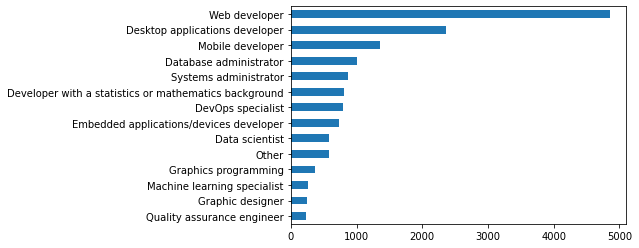

In [246]:
# Visualizing
(df_devtyp.cnt).plot(kind='barh', legend=None)

The vast majority of responders work as Web / Desktop application developer in the selected region. The third most frequent role was the Mobile developer.

## Question#2: Career Satisfaction

<AxesSubplot:>

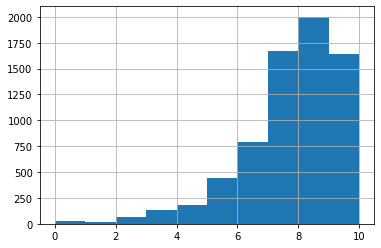

In [248]:
# Visualization of overall career satisfaction score frequency
df.CareerSatisfaction.hist()

The tendency is very positive, there is a high level of satisfaction in the selected population.

In [249]:
# Analyse mean career satisfaction scores per developer type
dt = []
labels = []
for idx in df_devtyp.index:
    labels.append(idx)
    df_filt = df[df.DeveloperType.str.contains(idx)]
    dt.append(df_filt.CareerSatisfaction.mean())
df_careersat = pd.DataFrame(dt, index=labels)
df_careersat.rename(columns={0:"meanCareerSatisfaction"}, inplace=True)
df_careersat

,meanCareerSatisfaction
Quality assurance engineer,7.570136
Graphic designer,7.476793
Machine learning specialist,7.629921
Graphics programming,7.271978
Other,7.486957
Data scientist,7.500000
Embedded applications/devices developer,7.375000
DevOps specialist,7.544192
Developer with a statistics or mathematics background,7.387985
Systems administrator,7.328306


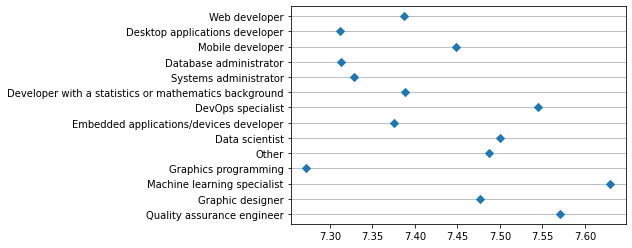

In [250]:
# Visualizing
plt.plot(df_careersat.meanCareerSatisfaction, 
         df_careersat.index,
        'D')
plt.grid(axis='y')

In general, I found similar career satisfaction values across the observed disciplines — the means calculated among those responders who reside in the geographical areas of interest vary between 7.27 and 7.63.

## Question#3: Opportunities with Bootcamps

In [255]:
# Analysing bootcamp attendees employers by company type
df_bc_attend.CompanyType.value_counts()

Privately-held limited company, not in startup mode                      151
Publicly-traded corporation                                               53
I don't know                                                              14
Venture-funded startup                                                    14
Government agency or public school/university                             12
Sole proprietorship or partnership, not in startup mode                   11
Non-profit/non-governmental organization or private school/university      7
I prefer not to answer                                                     6
Pre-series A startup                                                       4
Something else                                                             1
State-owned company                                                        1
Name: CompanyType, dtype: int64

In [257]:
# Analysing bootcamp attendees employers by company size
df_bc_attend.CompanySize.value_counts()

20 to 99 employees          68
100 to 499 employees        56
10,000 or more employees    45
1,000 to 4,999 employees    28
Fewer than 10 employees     27
10 to 19 employees          22
500 to 999 employees        18
5,000 to 9,999 employees     8
I don't know                 3
Name: CompanySize, dtype: int64

# Evaluation

Based on the data I analyzed (responders from the region of UK, Switzerland, Austria, Germany and Hungary),

 - There are a number of attractive tech disciplines in the region I live, web & desktop application developers along with mobile developers and database admins constitute the largest communities. This may indicate, that the market can be overloaded but it could also be the indicator of higher demand of these disciplines. In Stackoverflow, they are certainly well represented, thus knowledge transfer could be easier.
 - The general career satisfaction is fairly high which is a good sign for people before career shift. Machine learning specialists seem to be the most satisfied which is not surprising given the news about the ever growing demand in this field.
 - For bootcamp attendees, the doors for both private and public companies (in various company sizes) seem to be open.